In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from Energy_ds.dataset import DataPrep


In [37]:
# Function to determine the season
def get_season(date: datetime, north_hemisphere: bool = True) -> str:
        now = (date.month, date.day)
        if (3, 21) <= now < (6, 21):
            season = 'spring' if north_hemisphere else 'fall'
        elif (6, 21) <= now < (9, 21):
            season = 'summer' if north_hemisphere else 'winter'
        elif (9, 21) <= now < (12, 21):
            season = 'fall' if north_hemisphere else 'spring'
        else:
            season = 'winter' if north_hemisphere else 'summer'
        return season

def to_dataframe(file_path):
    data = pd.read_csv(file_path)

    # Convert the 'Datetime' column to datetime object
    data['Datetime'] = pd.to_datetime(data['Datetime'])

    # Extract year, day, hour, and week number
    data['Year'] = data['Datetime'].dt.year
    data['Day'] = data['Datetime'].dt.day
    data['Hour'] = data['Datetime'].dt.hour
    data['Week_Number'] = data['Datetime'].dt.isocalendar().week

    # Apply the function to the 'Datetime' column
    data['Season'] = data['Datetime'].apply(get_season)

    # Display the first few rows to verify
    # print(data.head())
    return data

def data_perp(data):
    data = to_dataframe(data)
    data.sort_values(by='Datetime', inplace=True)
    data = data.reset_index(drop=True)

    return data

In [2]:
path = "Hourly_Energy_Consumption/AEP_hourly.csv"


In [3]:
prper = DataPrep(path)
data = prper.data

In [4]:
DataPrep.to_tensor(data)

tensor([[1.2379e+04, 2.0040e+03, 1.0000e+00,  ..., 4.0000e+01, 3.0000e+00,
         1.0000e+00],
        [1.1935e+04, 2.0040e+03, 1.0000e+00,  ..., 4.0000e+01, 3.0000e+00,
         1.0000e+00],
        [1.1692e+04, 2.0040e+03, 1.0000e+00,  ..., 4.0000e+01, 3.0000e+00,
         1.0000e+00],
        ...,
        [1.7001e+04, 2.0180e+03, 2.0000e+00,  ..., 3.1000e+01, 2.0000e+00,
         1.0000e+00],
        [1.5964e+04, 2.0180e+03, 2.0000e+00,  ..., 3.1000e+01, 2.0000e+00,
         1.0000e+00],
        [1.4809e+04, 2.0180e+03, 3.0000e+00,  ..., 3.1000e+01, 2.0000e+00,
         1.0000e+00]])

In [6]:
data.to_numpy(dtype=np.float32, copy=True)

array([[1.0965924e+18, 1.2379000e+04, 2.0040000e+03, ..., 4.0000000e+01,
        3.0000000e+00, 1.0000000e+00],
       [1.0965960e+18, 1.1935000e+04, 2.0040000e+03, ..., 4.0000000e+01,
        3.0000000e+00, 1.0000000e+00],
       [1.0965996e+18, 1.1692000e+04, 2.0040000e+03, ..., 4.0000000e+01,
        3.0000000e+00, 1.0000000e+00],
       ...,
       [1.5332472e+18, 1.7001000e+04, 2.0180000e+03, ..., 3.1000000e+01,
        2.0000000e+00, 1.0000000e+00],
       [1.5332508e+18, 1.5964000e+04, 2.0180000e+03, ..., 3.1000000e+01,
        2.0000000e+00, 1.0000000e+00],
       [1.5332544e+18, 1.4809000e+04, 2.0180000e+03, ..., 3.1000000e+01,
        2.0000000e+00, 1.0000000e+00]], dtype=float32)

In [4]:
data.head(30)

,Datetime,MW,Year,Day,Hour,Week_Number,Season,Region
0,2004-10-01 01:00:00,12379.0,2004,1,1,40,fall,1
1,2004-10-01 02:00:00,11935.0,2004,1,2,40,fall,1
2,2004-10-01 03:00:00,11692.0,2004,1,3,40,fall,1
3,2004-10-01 04:00:00,11597.0,2004,1,4,40,fall,1
4,2004-10-01 05:00:00,11681.0,2004,1,5,40,fall,1
5,2004-10-01 06:00:00,12280.0,2004,1,6,40,fall,1
6,2004-10-01 07:00:00,13692.0,2004,1,7,40,fall,1
7,2004-10-01 08:00:00,14618.0,2004,1,8,40,fall,1
8,2004-10-01 09:00:00,14903.0,2004,1,9,40,fall,1
9,2004-10-01 10:00:00,15118.0,2004,1,10,40,fall,1


In [7]:
data.describe()

,Datetime,MW,Year,Day,Hour,Week_Number,Region
count,121273,121273.000000,121273.000000,121273.000000,121273.000000,121273.0,121273.0
mean,2011-09-02 03:17:01.553025024,15499.513717,2011.169988,15.723220,11.501587,26.49772,1.0
min,2004-10-01 01:00:00,9581.000000,2004.000000,1.000000,0.000000,1.0,1.0
25%,2008-03-17 15:00:00,13630.000000,2008.000000,8.000000,6.000000,13.0,1.0
50%,2011-09-02 04:00:00,15310.000000,2011.000000,16.000000,12.000000,26.0,1.0
75%,2015-02-16 17:00:00,17200.000000,2015.000000,23.000000,18.000000,40.0,1.0
max,2018-08-03 00:00:00,25695.000000,2018.000000,31.000000,23.000000,53.0,1.0
std,NaN,2591.399065,4.011177,8.802246,6.921830,15.130003,0.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Datetime     121273 non-null  datetime64[ns]
 1   MW           121273 non-null  float64       
 2   Year         121273 non-null  int32         
 3   Day          121273 non-null  int32         
 4   Hour         121273 non-null  int32         
 5   Week_Number  121273 non-null  UInt32        
 6   Season       121273 non-null  object        
 7   Region       121273 non-null  int64         
dtypes: UInt32(1), datetime64[ns](1), float64(1), int32(3), int64(1), object(1)
memory usage: 5.7+ MB


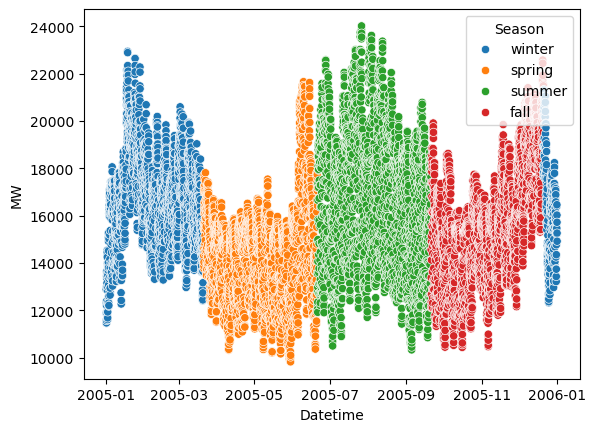

In [15]:
mask = data['Year'] == 2005
g = sns.scatterplot(data=data[mask], x='Datetime', y='MW', hue='Season')


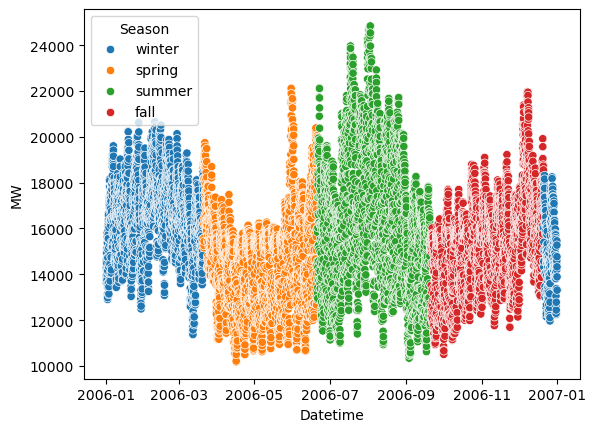

In [17]:
mask = data['Year'] == 2006
g = sns.scatterplot(data=data[mask], x='Datetime', y='MW', hue='Season')